<a href="https://colab.research.google.com/github/pierrestephanekanga/Reseaux_Neurones/blob/main/Reseau_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import fastai
fastai.__version__

'1.0.61'

In [42]:
#hide
!pip install -Uqq fastbook

import fastbook
fastbook.setup_book()

In [43]:
#hide
from fastbook import *

In [45]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

file = get_image_files(path)

In [46]:
file

(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_130.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_13.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_138.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_128.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_57.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_79.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_136.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pug_125.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_115.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_206.jpg')...]

In [47]:
file[0].name.rsplit("_",1)[0][0].isupper()

False

In [48]:
def file_cat_dog(fichier):
  cat_file = []
  dog_file = []
  for idx in fichier:
    if idx.name.rsplit("_",1)[0][0].isupper()==True:
      cat_file.append(idx)
    else:
      dog_file.append(idx)
  return cat_file, dog_file

In [49]:
cat_file, dog_file = file_cat_dog(file)

In [50]:
len(cat_file),len(dog_file)

(2400, 4990)

In [51]:
def labels_name(way):
  name = way.rsplit("_",1)[0]
  return name



dls_cat = ImageDataLoaders.from_name_func(
    path, cat_file, valid_pct=0.2, seed=42,
    label_func=labels_name, item_tfms=Resize(224))

learn_cat = cnn_learner(dls_cat, resnet18, metrics=error_rate)

dls_dog = ImageDataLoaders.from_name_func(
    path, dog_file, valid_pct=0.2, seed=42,
    label_func=labels_name, item_tfms=Resize(224))

learn_dog = cnn_learner(dls_dog, resnet18, metrics=error_rate)

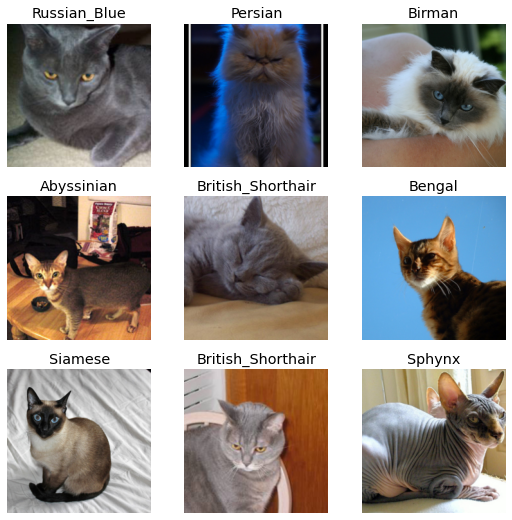

In [52]:
dls_cat.show_batch()

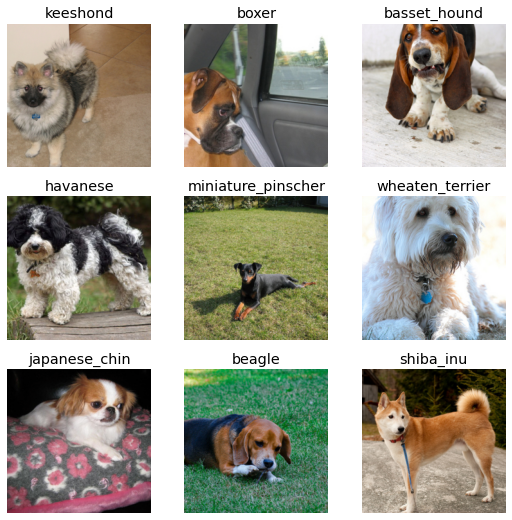

In [53]:
dls_dog.show_batch()

SuggestedLRs(valley=0.0008317637839354575)

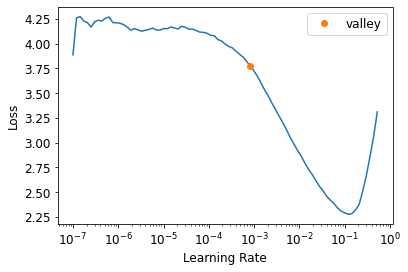

In [54]:
learn_cat.lr_find()

SuggestedLRs(valley=0.0005754399462603033)

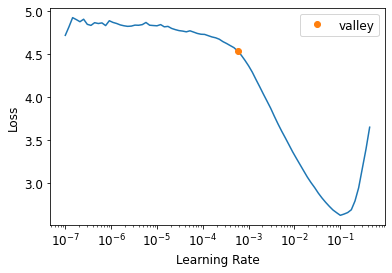

In [55]:
learn_dog.lr_find()

In [57]:
learn_cat.fine_tune(5, 8e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.217219,0.229689,0.070833,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.180411,0.223647,0.072917,00:28
1,0.170468,0.227989,0.075000,00:28
2,0.141511,0.231885,0.089583,00:28
3,0.114761,0.228209,0.075000,00:28
4,0.100737,0.218597,0.070833,00:28


In [58]:
learn_dog.fine_tune(5, 5e-4)

epoch,train_loss,valid_loss,error_rate,time
0,2.668659,0.560773,0.159319,00:47


epoch,train_loss,valid_loss,error_rate,time
0,0.865484,0.368306,0.103206,00:56
1,0.600552,0.276561,0.085170,00:56
2,0.408459,0.254041,0.077154,00:56
3,0.319988,0.244168,0.074148,00:56
4,0.269538,0.242977,0.075150,00:56


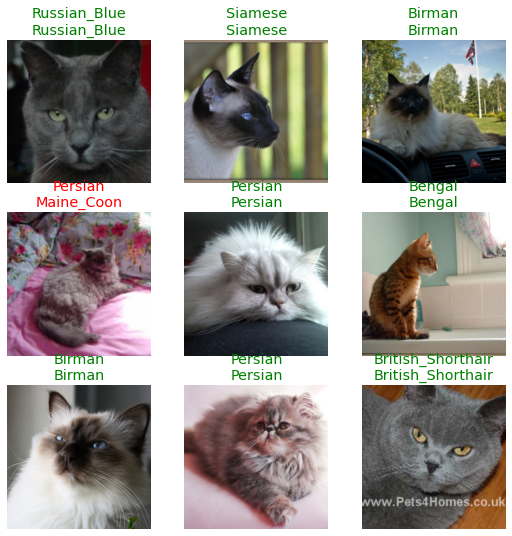

In [59]:
learn_cat.show_results()

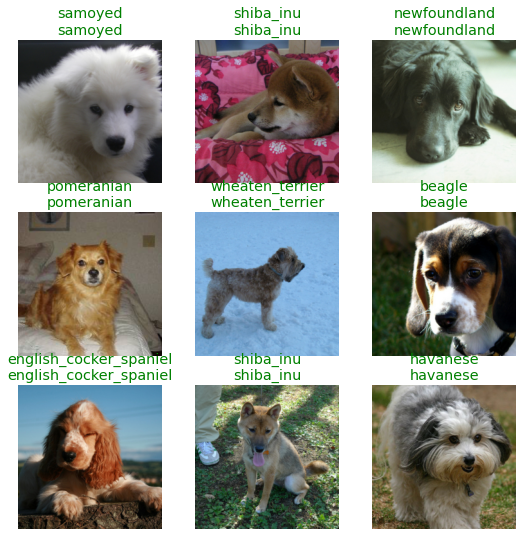

In [60]:
learn_dog.show_results()

In [61]:
#hide_output
uploader_cat = widgets.FileUpload()
uploader_cat

FileUpload(value={}, description='Upload')

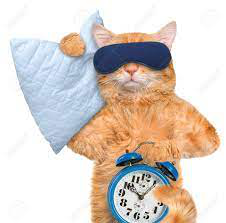

In [62]:
img_cat = PILImage.create(uploader_cat.data[0])
display(img_cat)

In [64]:
cat_name,_,probs = learn_cat.predict(img_cat)
print(f"La race de ce chat est : ",cat_name)
print(f"Avec une Probabilité de: {probs.max():.6f}")

La race de ce chat est :  Bengal
Avec une Probabilité de: 0.735843


In [65]:
#hide_output
uploader_dog = widgets.FileUpload()
uploader_dog

FileUpload(value={}, description='Upload')

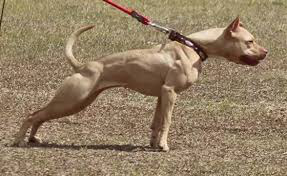

In [69]:
img_dog = PILImage.create(uploader_dog.data[0])
display(img_dog)

In [70]:
dog_name,_,probs = learn_dog.predict(img_dog)
print(f"La race de ce chien est : ",dog_name)
print(f"Avec une Probabilité de: {probs.max():.6f}")

La race de ce chien est :  american_pit_bull_terrier
Avec une Probabilité de: 0.660170
